# CNN_study.ipynb

### CNNs(convolutional neural networks)
#### neural network (신경망)의 한 종류
#### 컴퓨터 비전에 사용 (특히 시각적 데이터에서 패턴을 찾기)

- 다양한 문제에 다양한 종류의 모델 구조를 사용할 수 있다.
- 이미지 데이터 및 텍스트 데이터에서 예측을 하기 위해 CNN을 사용할 수도 있지만,
이 CNN이 이문제에 최선은 아니다.

### CNN 사용 사례
1. 음식 사진에 피자 또는 스테이크가 포함되어 있는지 분류
2. 이미지에 물체가 나타났는지 여부를 감지


### TensorFlow로 작업하는 과정
1. 작업할 데이터셋 준비하기
2. CNN의 구조를 설계
3. 설계한 CNN으로 이미지 분류
    * 모델을 위해 데이터 전처리
    * 모델 준비하고
    * 모델을 fit
    * 모델 평가


In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2021-06-12 10:39:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 34.64.4.48, 34.64.4.80, 34.64.4.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|34.64.4.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: `pizza_steak.zip'

pizza_steak.zip     100%[===================>] 104.50M  39.1MB/s    in 2.7s    

2021-06-12 10:39:20 (39.1 MB/s) - `pizza_steak.zip' saved [109579078/109579078]



간단한 개념을 익히기 위해 피자 또는 스테이크만 찾는 이진 분류기를 만들어보자


In [2]:
# zip file 풀기
import zipfile

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza steak


In [5]:
!ls pizza_steak/train/steak


1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

In [6]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"{len(dirnames)}개의 디렉토리가 있으며, '{dirpath}'에는 {len(filenames)}개의 이미지가 있다.")

2개의 디렉토리가 있으며, 'pizza_steak'에는 1개의 이미지가 있다.
2개의 디렉토리가 있으며, 'pizza_steak/test'에는 1개의 이미지가 있다.
0개의 디렉토리가 있으며, 'pizza_steak/test/steak'에는 250개의 이미지가 있다.
0개의 디렉토리가 있으며, 'pizza_steak/test/pizza'에는 250개의 이미지가 있다.
2개의 디렉토리가 있으며, 'pizza_steak/train'에는 1개의 이미지가 있다.
0개의 디렉토리가 있으며, 'pizza_steak/train/steak'에는 750개의 이미지가 있다.
0개의 디렉토리가 있으며, 'pizza_steak/train/pizza'에는 750개의 이미지가 있다.


In [7]:
number_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

number_steak_images_train

750

In [8]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(
    sorted(
        [item.name for item in data_dir.glob("*")]
    )
)

print(class_names)

['.DS_Store' 'pizza' 'steak']


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mping.imread(target_folder + "/"  + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 512, 3)


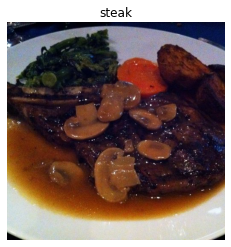

In [27]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [6]:
img

array([[[ 2,  4,  3],
        [ 2,  4,  3],
        [ 1,  3,  2],
        ...,
        [20,  7,  1],
        [18,  5,  0],
        [22,  9,  3]],

       [[ 2,  4,  3],
        [ 1,  3,  2],
        [ 1,  3,  2],
        ...,
        [28, 15,  7],
        [25, 12,  6],
        [24, 11,  5]],

       [[ 1,  3,  2],
        [ 1,  3,  2],
        [ 1,  3,  2],
        ...,
        [32, 17, 10],
        [26, 11,  6],
        [19,  6,  0]],

       ...,

       [[82, 59, 28],
        [86, 63, 32],
        [90, 67, 36],
        ...,
        [37, 30, 14],
        [38, 31, 15],
        [39, 32, 16]],

       [[75, 50, 19],
        [81, 56, 25],
        [86, 61, 30],
        ...,
        [38, 31, 15],
        [38, 31, 15],
        [37, 30, 14]],

       [[68, 43, 12],
        [74, 49, 18],
        [80, 55, 24],
        ...,
        [39, 32, 16],
        [37, 30, 14],
        [36, 29, 13]]], dtype=uint8)

In [7]:
type(img)

numpy.ndarray

### 저 shape의 결과를 보면 (가로, 세로, 색상 채널)의 형식으로 되어 있는 것을 알 수 있다.
### 너비와 높이는 이미지 마다 서로 다를 수는 있지만, 색상 이미지에서 채널 값은 항상 3이다.
### 왜? 채널은 일반적으로 RGB

### 또한, img 배열의 모든 값이 0 ~ 255 사이에 존재.
### RGB가 가능한 값의 범위가 0 ~ 255 사이이기 때문

### 피자와 스테이크의 이미지를 구분하는 모델을 만들 때, 각 클래스의 모양을 결정하는 다양한 픽셀 값에서 패턴을 찾는 것이 이미지 분류의 핵심이다.

### 신경망을 포함한 많은 기계 학습 모델은 0 ~ 1 사이의 값을 사용하는 것을 선호합니다.
### computer vision에서 이미지를 전처리할 때 가장 많이 하는 방식이 scaling을 합니다.
### 255로 나누는 방법을 사용하며, normalize 라는 표현을 사용한다.
 

In [28]:
img /255

array([[[0.10196078, 0.0627451 , 0.09803922],
        [0.11372549, 0.0745098 , 0.10588235],
        [0.18039216, 0.14509804, 0.16470588],
        ...,
        [0.03529412, 0.05882353, 0.15294118],
        [0.02745098, 0.05098039, 0.14509804],
        [0.01176471, 0.03529412, 0.12941176]],

       [[0.0627451 , 0.03529412, 0.06666667],
        [0.10980392, 0.08235294, 0.11372549],
        [0.24313725, 0.20392157, 0.23529412],
        ...,
        [0.03529412, 0.05882353, 0.15294118],
        [0.01568627, 0.03921569, 0.13333333],
        [0.        , 0.01960784, 0.11372549]],

       [[0.06666667, 0.04313725, 0.08235294],
        [0.10588235, 0.08627451, 0.11372549],
        [0.27058824, 0.24313725, 0.2745098 ],
        ...,
        [0.03137255, 0.05490196, 0.15686275],
        [0.01568627, 0.03921569, 0.13333333],
        [0.00784314, 0.03137255, 0.1254902 ]],

       ...,

       [[0.00784314, 0.00392157, 0.03529412],
        [0.01568627, 0.01176471, 0.03529412],
        [0.01176471, 0

## CNN 구조
- CNN은 **다양한 방식**으로 만들어 질 수 있다!


## CNN의 일반적인 구성요소 (comnent)
| 하이퍼파라미터/레이어 종류 | 하는 일 | 일반적인 값 |
|----------------------------|---------|-------------|
| 입력 이미지 | 패턴을 발견하고 싶은 대상 이미지 | 이미지(일반적 이미지) |
| 입력 층 | 대상 이미지를 가져와서 다음 계층에 전달하기 위해 사전 처리 | input_shape = [batch_size, image_height, image_width, color_channels]
| Convolution 층 (합성층) | 대상 이미지에서 가장 중요한 특징을 추출 / 학습하는 층 | tf.keras.layers.ConvXD 등등 생성 |
| 합성층의 활성함수 | 학습한 틍성에 비선형을 추가 | 일반적으로 ReLU |(tf.keras.activations.relu)  
| 은닉층 (Hidden) |
| 풀링층 (Pooling) |
| Fully connected layer (완전결합층) |
| 출력층 |
| 출력 활성함수 |


[tensorflow.keras.preprocessing.image](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(
    train_dir,                  # 학습 이미지가 있는 디렉토리를 지정하고
    batch_size = 30,            # 1번에 처리할 이미지의 갯수
    target_size = (224, 224),    # 처리할 이미지의 크기를 224 X 224fh whwjd
    class_mode = 'binary',
    seed = 42
    )

valid_data = valid_datagen.flow_from_directory(
    train_dir,                  # 학습 이미지가 있는 디렉토리를 지정하고
    batch_size = 30,            # 1번에 처리할 이미지의 갯수
    target_size = (224, 224),    # 처리할 이미지의 크기를 224 X 224fh whwjd
    class_mode = 'binary',
    seed = 42
    )


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [3]:
# CNN 모델 생성

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 3, # (3, 3)
        activation = "relu",
        input_shape = (224, 224, 3)
    ),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(
        pool_size = 2,  # (2, 2)
        padding = "valid"
    ),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [4]:
# 모델 컴파일

model_1.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [5]:
from scipy import *

zsh:1: command not found: scipy


In [8]:
# 모델에게 데이터 학습 (fitting)
history_1 = model_1.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)

Epoch 1/5
50/50 [==============================] - 106s 2s/step - loss: 0.0453 - accuracy: 0.9887 - val_loss: 0.0306 - val_accuracy: 0.9933
Epoch 2/5
50/50 [==============================] - 107s 2s/step - loss: 0.0664 - accuracy: 0.9800 - val_loss: 0.4125 - val_accuracy: 0.8013
Epoch 3/5
50/50 [==============================] - 98s 2s/step - loss: 0.1234 - accuracy: 0.9600 - val_loss: 0.0337 - val_accuracy: 0.9947
Epoch 4/5
50/50 [==============================] - 105s 2s/step - loss: 0.0248 - accuracy: 0.9960 - val_loss: 0.0168 - val_accuracy: 0.9967
Epoch 5/5
50/50 [==============================] - 91s 2s/step - loss: 0.0146 - accuracy: 0.9973 - val_loss: 0.0060 - val_accuracy: 1.0000


In [9]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [10]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [17]:
model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [18]:
history_2 = model_2.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)


Epoch 1/5
50/50 [==============================] - 20s 392ms/step - loss: 0.9562 - accuracy: 0.4887 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
50/50 [==============================] - 18s 370ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
50/50 [==============================] - 20s 406ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
50/50 [==============================] - 22s 434ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
50/50 [==============================] - 21s 415ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [19]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [20]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='sigmoid')

])

model3.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizer.Adam(),
    metrics = ["accuracy"]
)

history_3 = model_3.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data = valid_data,
    validation_steps = len(valid_data)
)


NameError: name 'model3' is not defined